In [47]:
from spinup.utils.logx import restore_tf_graph
import tensorflow as tf
from os import path as osp
from spinup.utils.test_policy import load_policy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
path = '/Users/samlaf/programming/spinningup/data/ddpg_reacher/ddpg_reacher_s0'

In [5]:
sess = tf.Session()
model = restore_tf_graph(sess, osp.join(path, 'simple_save'))

W1024 18:55:59.495302 4688852416 module_wrapper.py:139] From /Users/samlaf/programming/RL-neural-manifold/spinup/utils/logx.py:59: The name tf.saved_model.tag_constants.SERVING is deprecated. Please use tf.saved_model.SERVING instead.

W1024 18:55:59.506685 4688852416 deprecation.py:323] From /Users/samlaf/programming/RL-neural-manifold/spinup/utils/logx.py:60: load (from tensorflow.python.saved_model.loader_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
W1024 18:56:02.015872 4688852416 module_wrapper.py:139] From /Users/samlaf/programming/RL-neural-manifold/spinup/utils/logx.py:63: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [13]:
env, _ = load_policy(path)
x = model['x']

Using default action op.


In [45]:
# We gather n activations of the last layer into a buffer
n = 100
acts = np.zeros((n,32))
for i in range(n):
    o = env.reset()
    last_layer_act = sess.run('main/pi/dense_1/Relu:0', feed_dict={x: o[None,:]})
    acts[i] = last_layer_act

# Here we get a 5d manifold for 32d layer

Total explained variance: 0.975127075016689


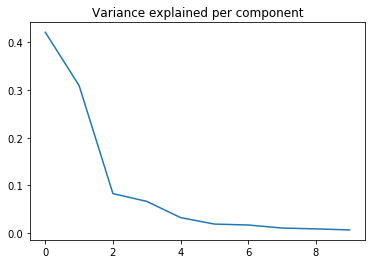

In [52]:
pca = PCA(n_components=10)
pca.fit(acts)
plt.plot(pca.explained_variance_ratio_)
plt.title("Variance explained per component")
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Text(0.5, 1.0, 'Total variance explained per # of pcs')

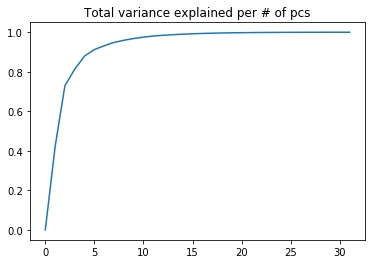

In [56]:
total_var = []
for k in range(32):
    pca = PCA(n_components=k)
    pca.fit(acts)
    total_var.append(pca.explained_variance_ratio_.sum())
plt.plot(total_var)
plt.title("Total variance explained per # of pcs")